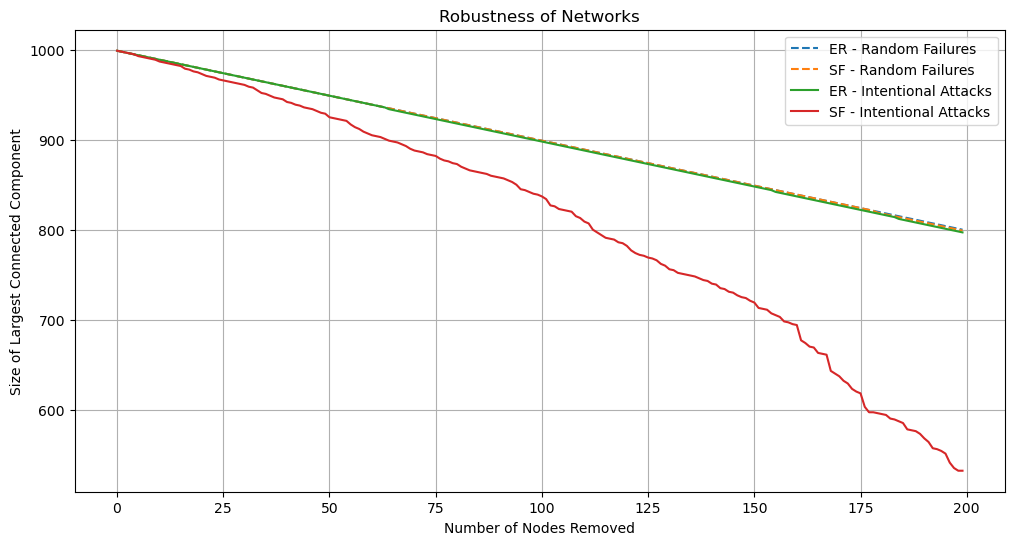

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def simulate_robustness(graph, removal_strategy, num_steps=None):
    G = graph.copy()
    largest_cc_sizes = []
    nodes_to_remove = list(G.nodes)

    if removal_strategy == "degree":
        nodes_to_remove = sorted(G.nodes, key=lambda n: G.degree[n], reverse=True)
    elif removal_strategy == "random":
        random.shuffle(nodes_to_remove)

    if num_steps is None:
        num_steps = len(nodes_to_remove)

    for _ in range(num_steps):
        if not G.nodes:
            break
        node = nodes_to_remove.pop(0)
        G.remove_node(node)
        if nx.is_empty(G):
            largest_cc_sizes.append(0)
        else:
            largest_cc_sizes.append(len(max(nx.connected_components(G), key=len)))
    
    return largest_cc_sizes

num_nodes = 1000
p = 0.01
m = 3

ER_graph = nx.erdos_renyi_graph(num_nodes, p)
SF_graph = nx.barabasi_albert_graph(num_nodes, m)

steps = 200
ER_random_failures = simulate_robustness(ER_graph, "random", steps)
SF_random_failures = simulate_robustness(SF_graph, "random", steps)
ER_intentional_attacks = simulate_robustness(ER_graph, "degree", steps)
SF_intentional_attacks = simulate_robustness(SF_graph, "degree", steps)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(ER_random_failures, label="ER - Random Failures", linestyle='--')
plt.plot(SF_random_failures, label="SF - Random Failures", linestyle='--')
plt.plot(ER_intentional_attacks, label="ER - Intentional Attacks")
plt.plot(SF_intentional_attacks, label="SF - Intentional Attacks")
plt.xlabel("Number of Nodes Removed")
plt.ylabel("Size of Largest Connected Component")
plt.title("Robustness of Networks")
plt.legend()
plt.grid()
plt.show()


### P 7.19

1. Random Failures:

ER Graphs: are relatively robust to random failures because their degree distribution is fairly uniform. Removing random nodes is less likely to disrupt the connectivity significantly.
SF Networks are highly robust to random failures because most nodes have a low degree, so removing them does not significantly impact the network's structure.


2. Intentional Attacks:

ER Graphs: moderately vulnerable to intentional attacks because nodes with the highest degree still have relatively low centrality compared to scale-free networks.
SF networks are highly vulnerable to intentional attacks because their connectivity depends heavily on a few high-degree hubs. Removing these hubs can quickly fragment the network.